# AirBnB San Francisco Room Price Project Not averaged
#### Capstone 2 - Hallie McConlogue

# Problem Statement Worksheet (My Hypothesis)
The business problem I am investigating is what rate I can charge on AirBnB for rooms in my family’s home in San Francisco in the next year.

#### Focus
For this solution I will focus on comparing features of the rooms I have to those being rented in San Francisco on AirBnB in order to get a good estimate for what I should charge per room.


#### Data sources
General market research:
https://www.statista.com/statistics/206546/us-hotels-occupancy-rate-by-month/

##### AirBnB data 
Description:
https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=982310896
http://insideairbnb.com/get-the-data.html

SF listings:
http://data.insideairbnb.com/united-states/ca/san-francisco/2021-04-07/visualisations/listings.csv


#### How I will solve the AirBnB problem in brief:
Clean the data.

Look at scatter plots of features and reviews vs room price.

Build a heat map that shows what columns most affect room price.

Normalize significant column values with each other.

Run machine analysis to find appropriate market value for my rooms.


## Data wrangling goals:

#### Data Collection Time estimate: 1-2 hours
■ Data loading -done

■ Data joining - first pass done

■ Import pandas library, for read_csv() -done

■ try merge, join, or concatenate. -first pass done

#### Data Organization - Time estimate: 1-2 hours
■ File structure - done

■ GitHub - done

■ Hint: the glob library could come in handy here…  Should I use this here Ben?

■ Why GitHub again? Done: portfolio comits to bring you back to pre mistake co work with mentor?  other students?

#### Data Definition - understanding of your data - Time estimate: 1-2 hours
■ Description of the columns good look close at them - done

■ Counts and percents unique values -  done

■ Names accurate - done

■ Data types of your columns right - done? ... mostly

■ Statistics for columns, 
    - mean, 
    - median, 
    - mode, 
    - standard deviation, 
    - range, and
    - number of unique values. 

■ Conclusions?

■ investigate further?

### Data Cleaning - Time estimate: 1-2 hours
■ NA or missing values - done

■ Duplicates ... 

#### Use these:
■ loc[] - filter your data by label

■ iloc[] - filter your data by indexes -- doesn't apply

■ apply() - execute a function across an axis of a DataFrame

■ drop() - drop columns from a DataFrame - done

■ is_unique() - check if a column is a unique identifier

■ Series methods:
    - str.contains(), which can be used to check if a certain substring occurs in a string of a Series, and 
    - str.extract(), which can be used to extract capture groups with a certain regex (or regular expression) pattern

■ numPy methods like 
    - .where(), to clean columns. Recall that such methods have the structure: np.where(condition, then, else)


■ DataFrame methods to check for null values, such as  - done
    - df.isnull().values.any()
    
    
outliers 
bad data
missing data venture into eda
clean data frame


# Importing packages needed to complete project:

In [29]:
#Code task 1#
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plot
import datetime

### Loading files

In [30]:
# the supplied CSV data file is the raw_data directory
#listings_data = pd.read_csv('../raw_data/listingsApril2021.csv')
listings_data = pd.read_csv('../raw_data/AirbnbAugust21/listingsMoreDataAug21.csv')
description = pd.read_csv('../raw_data/AirbnbAugust21/Decriptions_Aug21.csv')


## Looking at data:

#### Column descriptions:

In [31]:
description.style.set_properties(**{'text-align': 'left'})



,Data Dictionary for listings.csv detailed file,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,nan,nan,nan,nan
1,File Name,nan,listings.csv,nan
2,Version,nan,4,nan
3,Date Introduced,nan,"August, 2020",nan
4,Description,nan,nan,nan
5,nan,nan,nan,nan
6,Field,Description,Type,Calculated
7,id,Airbnb's unique identifier for the listing,integer,nan
8,listing_url,nan,text,y
9,scrape_id,"Inside Airbnb ""Scrape"" this was part of",bigint,y


#### Data Types

In [32]:
listings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6612 entries, 0 to 6611
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6612 non-null   int64  
 1   listing_url                                   6612 non-null   object 
 2   scrape_id                                     6612 non-null   int64  
 3   last_scraped                                  6612 non-null   object 
 4   name                                          6612 non-null   object 
 5   description                                   6540 non-null   object 
 6   neighborhood_overview                         4801 non-null   object 
 7   picture_url                                   6612 non-null   object 
 8   host_id                                       6612 non-null   int64  
 9   host_url                                      6612 non-null   o

#### Head

In [33]:
listings_data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20210804005755,2021-08-04,"Bright, Modern Garden Unit - 1BR/1BTH",Please check local laws re Covid before you re...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,https://www.airbnb.com/users/show/1169,...,4.90,4.98,4.78,City Registration Pending,f,1,1,0,0,3.50
1,5858,https://www.airbnb.com/rooms/5858,20210804005755,2021-08-04,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.78
2,7918,https://www.airbnb.com/rooms/7918,20210804005755,2021-08-04,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",https://a0.muscache.com/pictures/26356/8030652...,21994,https://www.airbnb.com/users/show/21994,...,4.60,4.73,4.00,NaN,f,9,0,9,0,0.17
3,8142,https://www.airbnb.com/rooms/8142,20210804005755,2021-08-04,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,https://a0.muscache.com/pictures/27832/3b1f9e5...,21994,https://www.airbnb.com/users/show/21994,...,4.75,4.63,4.63,NaN,f,9,0,9,0,0.10
4,8339,https://www.airbnb.com/rooms/8339,20210804005755,2021-08-04,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/213fbf05-3545...,24215,https://www.airbnb.com/users/show/24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.19


# Cleaning the data 

#### looking for missing data

In [34]:
missing = pd.concat([listings_data.isnull().sum(), 100 * listings_data.isnull().mean()], axis=1)
missing.columns=['count', '% missing']

missing_sorted = missing.sort_values(by='count', ascending=False)
print('missing_sorted:',type(missing_sorted))

missing_sorted.style.set_properties(**{'text-align': 'left'})


missing_sorted: <class 'pandas.core.frame.DataFrame'>


,count,% missing
neighbourhood_group_cleansed,6612,100.000000
bathrooms,6612,100.000000
calendar_updated,6612,100.000000
license,2822,42.679976
host_about,1967,29.748941
neighborhood_overview,1811,27.389595
neighbourhood,1811,27.389595
review_scores_value,1573,23.790079
review_scores_location,1573,23.790079
review_scores_checkin,1573,23.790079


#### Dropping empty columns 

In [35]:
listings_data = listings_data.drop(['neighbourhood_group_cleansed','calendar_updated','bathrooms'], axis=1)

In [36]:
listings_data = listings_data.drop(['neighbourhood'], axis=1)

In [37]:
listings_data['license'] = listings_data['license'].isnull() == False
listings_data['license'].value_counts()

True     3790
False    2822
Name: license, dtype: int64

In [38]:
listings_data['host_is_superhost']=listings_data['host_is_superhost'].str.replace('t','1')
listings_data['host_is_superhost']=listings_data['host_is_superhost'].str.replace('f','0')
listings_data['host_is_superhost'] = pd.to_numeric(listings_data['host_is_superhost'])
listings_data['host_is_superhost'] = listings_data['host_is_superhost'].astype(bool)
listings_data['host_is_superhost'].value_counts()

False    4053
True     2559
Name: host_is_superhost, dtype: int64

#### Filling in missing data with "" 

###### host_about 

In [39]:
listings_data['host_about']= listings_data['host_about'].fillna("")
listings_data['neighborhood_overview']= listings_data['neighborhood_overview'].fillna("")
listings_data['description']= listings_data['description'].fillna("")
listings_data['host_response_rate']=listings_data['host_response_rate'].str.replace('%','')

##### Host Response change this leave it NA
##### host_response_rate Does this indicate weather or not the room was rented? 
I compared this to reviews and analysed the airbnb system and how it works.  I looked up the definition more closely.

##### Conclusion:  
The host response N/A relates more to when the listing is available for later but not now (possibly covid)  Or Just listed recently... if it were listed but not responded to at all there would be a bad mark on the listing instead of N/A ... I think.  Also there has been a move to 30 day rentals which would reduce the need for responses withing a 30 day limit of the response rate.

There is good value numeric data here but a lot is missing.  After looking closely filling in an average would be best here. It seems these are the listings that were not sold in that month.  Listings may or may not have been ignored or unused, or somehow the data for these fields just didn't make it in for this time period.

In [40]:
listings_data['host_response_rate'].isna().sum()

1494

In [41]:
listings_data['host_response_rate']=listings_data['host_response_rate'].str.replace('%','')

In [42]:
listings_data['host_response_rate'] = pd.to_numeric(listings_data['host_response_rate'])

### Saving data file - for time / availablilty merge

In [43]:
listings_data.to_csv('AirBnB_listings_basic_clean.csv')

## Splitting off the more active listings into Host_responded

In [45]:
Host_responded = listings_data.dropna(axis=0, subset=['host_response_rate'])
Host_responded.shape

(5118, 70)

## Splitting off Reviewed listings into Has_review

In [46]:
Has_review = listings_data.dropna(axis=0, subset=['review_scores_value'])
Has_review.shape

(5039, 70)

In [47]:
Has_review['review_scores_value'].isna().sum()

0

In [48]:
missing = pd.concat([Has_review.isnull().sum(), 100 * Has_review.isnull().mean()], axis=1)
missing.columns=['count', '% missing']

missing_sorted = missing.sort_values(by='count', ascending=False)
print('missing_sorted:',type(missing_sorted))

missing_sorted.style.set_properties(**{'text-align': 'left'})

missing_sorted: <class 'pandas.core.frame.DataFrame'>


,count,% missing
host_response_time,1045,20.738242
host_response_rate,1045,20.738242
host_acceptance_rate,940,18.654495
bedrooms,676,13.415360
host_neighbourhood,333,6.608454
beds,16,0.317523
host_location,5,0.099226
bathrooms_text,4,0.079381
maximum_minimum_nights,1,0.019845
minimum_maximum_nights,1,0.019845


### Bed n bath

In [49]:
Has_review['beds']= Has_review['beds'].fillna(1)
Has_review['bedrooms']= Has_review['bedrooms'].fillna(1)
Has_review['bathrooms_text']= Has_review['bathrooms_text'].fillna("")

<ipython-input-49-7d13bf236ed8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Has_review['beds']= Has_review['beds'].fillna(1)
<ipython-input-49-7d13bf236ed8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Has_review['bedrooms']= Has_review['bedrooms'].fillna(1)
<ipython-input-49-7d13bf236ed8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [50]:
#Has_review = Has_review.dropna(axis=0, subset=['minimum_nights_avg_ntm'])

Has_review['beds'] = pd.to_numeric(Has_review['beds'])
Has_review['bedrooms'] = pd.to_numeric(Has_review['bedrooms'])

Has_review['bedrooms'].unique()

<ipython-input-50-b3bfb36baaf6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Has_review['beds'] = pd.to_numeric(Has_review['beds'])
<ipython-input-50-b3bfb36baaf6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Has_review['bedrooms'] = pd.to_numeric(Has_review['bedrooms'])


array([1., 2., 3., 4., 5., 6., 7., 8., 9.])

## Dealing with Host Response rate:

In [51]:
missing2 = pd.concat([Has_review.isnull().sum(), 100 * Has_review.isnull().mean()], axis=1)
missing2.columns=['count', '% missing']

missing_sorted2 = missing2.sort_values(by='count', ascending=False)
print('missing_sorted2:',type(missing_sorted))

missing_sorted2.style.set_properties(**{'text-align': 'left'})

missing_sorted2: <class 'pandas.core.frame.DataFrame'>


,count,% missing
host_response_rate,1045,20.738242
host_response_time,1045,20.738242
host_acceptance_rate,940,18.654495
host_neighbourhood,333,6.608454
host_location,5,0.099226
maximum_nights_avg_ntm,1,0.019845
minimum_minimum_nights,1,0.019845
minimum_nights_avg_ntm,1,0.019845
maximum_maximum_nights,1,0.019845
minimum_maximum_nights,1,0.019845


In [52]:
# host response info
#Has_review.hist(column='host_response_rate')
#plt.show()
#Has_review.host_response_rate.unique()
#Has_review.info()
Has_review['host_response_rate']= Has_review['host_response_rate'].fillna(0.0)


<ipython-input-52-440913559830>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Has_review['host_response_rate']= Has_review['host_response_rate'].fillna(0.0)


In [53]:
# host response info

Has_review.host_response_time.unique()
Has_review['host_response_time']= Has_review['host_response_time'].fillna('no response or NA')

<ipython-input-53-8c6061bfd495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Has_review['host_response_time']= Has_review['host_response_time'].fillna('no response or NA')


In [54]:
Has_review.host_acceptance_rate.unique()
Has_review['host_acceptance_rate']= Has_review['host_acceptance_rate'].fillna('0%')
listings_data['host_acceptance_rate']=listings_data['host_acceptance_rate'].str.replace('%','')
listings_data['host_acceptance_rate'] = pd.to_numeric(listings_data['host_acceptance_rate'])

<ipython-input-54-e6fc3cdb4080>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Has_review['host_acceptance_rate']= Has_review['host_acceptance_rate'].fillna('0%')


In [55]:
#Has_review.host_neighbourhood.unique()
 #Has_review['host_neighbourhood']= Has_review['host_neighbourhood'].fillna(Has_review['nieghborhood cleansed'] = )
Has_review["host_neighbourhood"].fillna(Has_review["neighbourhood_cleansed"], inplace=True)
Has_review["host_location"].fillna(Has_review["neighbourhood_cleansed"], inplace=True)

Has_review = Has_review.dropna(axis=0, subset=['minimum_minimum_nights'])

C:\Users\micro\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [56]:
missing2 = pd.concat([Has_review.isnull().sum(), 100 * Has_review.isnull().mean()], axis=1)
missing2.columns=['count', '% missing']

missing_sorted2 = missing2.sort_values(by='count', ascending=False)
print('missing_sorted2:',type(missing_sorted))

missing_sorted2.style.set_properties(**{'text-align': 'left'})

missing_sorted2: <class 'pandas.core.frame.DataFrame'>


,count,% missing
id,0,0.000000
maximum_nights_avg_ntm,0,0.000000
calendar_last_scraped,0,0.000000
availability_365,0,0.000000
availability_90,0,0.000000
availability_60,0,0.000000
availability_30,0,0.000000
has_availability,0,0.000000
minimum_nights_avg_ntm,0,0.000000
number_of_reviews_ltm,0,0.000000


### Culling Rediculous prices for single rooms

In [ ]:
room_type Private room

# looking at my nieghborhood

In [57]:
Has_review['neighbourhood_cleansed'].value_counts()

Downtown/Civic Center    541
Mission                  470
Western Addition         334
South of Market          277
Bernal Heights           266
Castro/Upper Market      253
Haight Ashbury           249
Outer Sunset             235
Noe Valley               206
Nob Hill                 183
Potrero Hill             139
North Beach              132
Inner Richmond           131
Marina                   128
Outer Richmond           126
Bayview                  121
Russian Hill             121
Inner Sunset             115
Excelsior                112
Pacific Heights          109
Financial District       105
Outer Mission            102
Chinatown                 93
Parkside                  91
West of Twin Peaks        86
Ocean View                70
Visitacion Valley         48
Twin Peaks                45
Glen Park                 43
Crocker Amazon            30
Lakeshore                 23
Presidio Heights          22
Diamond Heights           10
Seacliff                  10
Presidio      

### Looking at price vs location rating

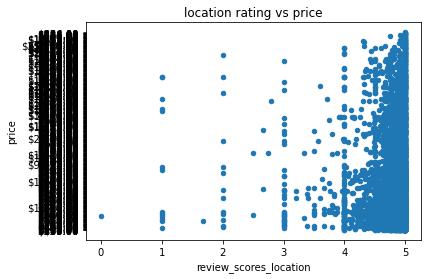

In [58]:
Has_review.plot.scatter(x='review_scores_location', y='price', title= "location rating vs price");

plot.show(block=True);

### neighborhood counts found a cleansed neighbourhood column

In [59]:
ldf = Has_review['neighbourhood_cleansed'].value_counts()
hoodDF = ldf.to_frame()
hoodDF.style.set_properties(**{'text-align': 'left'})

,neighbourhood_cleansed
Downtown/Civic Center,541
Mission,470
Western Addition,334
South of Market,277
Bernal Heights,266
Castro/Upper Market,253
Haight Ashbury,249
Outer Sunset,235
Noe Valley,206
Nob Hill,183


In [60]:
messyHood = Has_review['host_neighbourhood'].value_counts()
hoodMessDF = messyHood.to_frame()
hoodMessDF.style.set_properties(**{'text-align': 'left'})

,host_neighbourhood
Mission District,393
Noe Valley,297
Bernal Heights,244
Richmond District,233
Outer Sunset,231
The Castro,183
Western Addition/NOPA,178
SoMa,174
Nob Hill,164
Union Square,158


### How many listings in each neighborhood

Text(0.5, 0, 'AirBnB Listings')

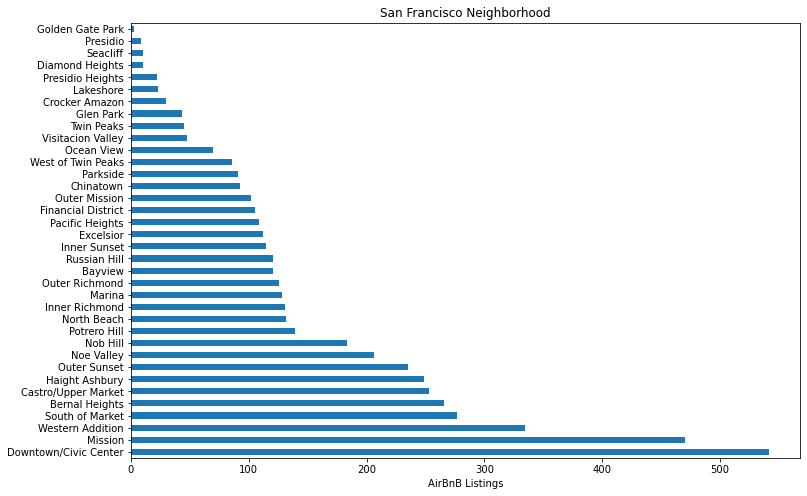

In [61]:
#Specify a horizontal barplot ('barh') as kind of plot (kind=)
NPlot = Has_review.neighbourhood_cleansed.value_counts().plot(kind='barh', figsize=(12, 8))
#Give the plot a helpful title of 'Neighborhood'
NPlot.set_title('San Francisco Neighborhood')
#Label the xaxis 'Listings'
NPlot.set_xlabel('AirBnB Listings')


### Neighborhoods sorted by average price

In [62]:
Has_review['price'] = Has_review['price'].str.replace('$','')
Has_review['price'] = Has_review['price'].str.replace(',','')
Has_review['price'] = pd.to_numeric(Has_review['price'])
Has_review['beds'] = pd.to_numeric(Has_review['beds'])
Has_review['price_per_bed'] = Has_review['price']/Has_review['beds']
Has_review['price_per_bedroom'] = Has_review['price']/Has_review['bedrooms']
Has_review['price_per_person'] = Has_review['price']/Has_review['accommodates']

In [63]:
myHood = Has_review[Has_review['neighbourhood_cleansed']=='Bernal Heights']
myHood.head(60)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price_per_bed,price_per_bedroom,price_per_person
1,5858,https://www.airbnb.com/rooms/5858,20210804005755,2021-08-04,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,https://www.airbnb.com/users/show/8904,...,False,f,1,1,0,0,0.78,78.333333,117.500000,47.000000
22,29373,https://www.airbnb.com/rooms/29373,20210804005755,2021-08-04,Sunny house with garden,Our house is a two story building with yard on...,I love its friendly atmosphere and the many ea...,https://a0.muscache.com/pictures/a0ba2f89-c3c5...,126263,https://www.airbnb.com/users/show/126263,...,True,f,2,1,1,0,0.27,86.000000,86.000000,43.000000
24,32414,https://www.airbnb.com/rooms/32414,20210804005755,2021-08-04,"Cozy, Sunny and Private Space",Conveniently located on Cortland Avenue - the ...,Bernal Heights is a wonderful neighborhood ful...,https://a0.muscache.com/pictures/693795/b4a6ff...,140251,https://www.airbnb.com/users/show/140251,...,True,f,1,1,0,0,1.05,75.000000,150.000000,75.000000
27,39418,https://www.airbnb.com/rooms/39418,20210804005755,2021-08-04,"Comfortable Home Base, Bernal Heights","Bernal is following safe opening guidelines, u...",This is uniquely positioned on western slope o...,https://a0.muscache.com/pictures/33eff7d3-84ae...,169184,https://www.airbnb.com/users/show/169184,...,False,f,2,2,0,0,0.29,73.000000,73.000000,36.500000
29,41172,https://www.airbnb.com/rooms/41172,20210804005755,2021-08-04,Sue's Place in Bernal Heights,Registration number: STR-0000122<br />Sue's Pl...,,https://a0.muscache.com/pictures/29903170/ce66...,53314,https://www.airbnb.com/users/show/53314,...,True,f,1,0,1,0,2.23,129.000000,129.000000,64.500000
39,53280,https://www.airbnb.com/rooms/53280,20210804005755,2021-08-04,Large & sunny room with bath + yard,"Spacious, private and quiet room with: kitchen...",It is a friendly and homey neighborhood. Lots ...,https://a0.muscache.com/pictures/e8c64cd3-4364...,126263,https://www.airbnb.com/users/show/126263,...,True,f,2,1,1,0,1.23,95.000000,95.000000,47.500000
47,57561,https://www.airbnb.com/rooms/57561,20210804005755,2021-08-04,"Bernal Heights Apartment, Patio + Parking",Private luxury apartment (one bedroom) in the ...,"See guide at,<br /><br />(URL HIDDEN)",https://a0.muscache.com/pictures/2d15b761-4c46...,272890,https://www.airbnb.com/users/show/272890,...,True,f,1,1,0,0,2.21,178.000000,178.000000,89.000000
51,59702,https://www.airbnb.com/rooms/59702,20210804005755,2021-08-04,Garden Cottage Charming!,This 9' x 12' cottage is in the garden of two ...,Weather gorgeous! Ambiance incredible!<br />Pe...,https://a0.muscache.com/pictures/362832/34ad06...,287136,https://www.airbnb.com/users/show/287136,...,True,t,1,0,1,0,2.27,150.000000,150.000000,75.000000
64,70139,https://www.airbnb.com/rooms/70139,20210804005755,2021-08-04,Noe Valley Eco-Escape +Maid Service,"Available starting October 1, 2021, for monthl...",We live on a lovely street with front and back...,https://a0.muscache.com/pictures/674096/5d784b...,354456,https://www.airbnb.com/users/show/354456,...,False,f,1,1,0,0,0.10,55.000000,110.000000,36.666667
66,71645,https://www.airbnb.com/rooms/71645,20210804005755,2021-08-04,Northslope Studio in Bernal Heights with a Zen...,Wake up to the soothing green view from this f...,"Bernal Heights is an intimate, village-like co...",https://a0.muscache.com/pictures/monet/Select-...,367464,https://www.airbnb.com/users/show/367464,...,True,f,1,1,0,0,2.96,114.000000,114.000000,57.000000


<ipython-input-64-138bb2e8f707>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hood_price_means = Has_review.groupby('neighbourhood_cleansed')['price','price_per_bedroom','price_per_person','price_per_bed'].mean()


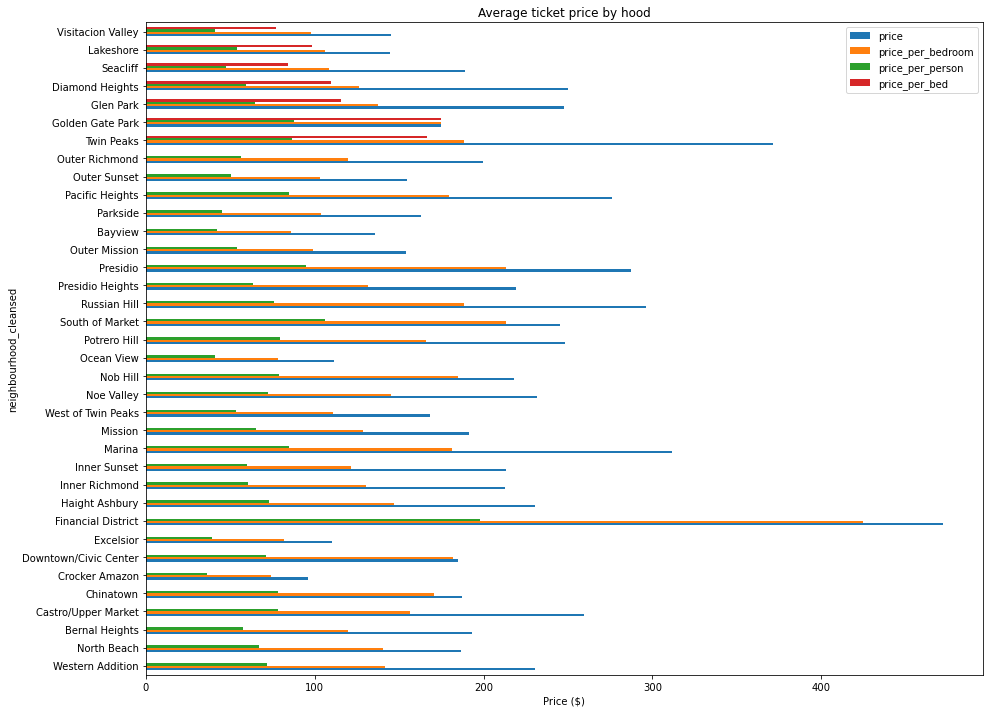

In [64]:
hood_price_means = Has_review.groupby('neighbourhood_cleansed')['price','price_per_bedroom','price_per_person','price_per_bed'].mean()

#hood_price_means = filled_avg.groupby('neighbourhood_cleansed')['price','price_per_bedroom'].mean()
#hood_price_means.sort_values()

(hood_price_means.reindex(index=hood_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(15, 12), title='Average ticket price by hood'))
plt.xlabel('Price ($)');


#### Distribution of price per bedroom and price by person  by neighborhood

In [65]:
#room_prices = pd.melt(filled_avg[['neighbourhood_cleansed', 'price', 'price_per_person']], 
#                        id_vars='neighbourhood_cleansed', 
#                        var_name='price per', 
#                        value_vars=['price_per_bedroom', 'price_per_person'], 
#                        value_name='Prices')

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

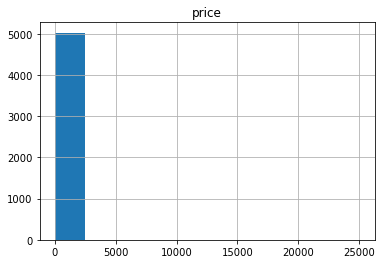

In [66]:
Has_review.hist(column='price')

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

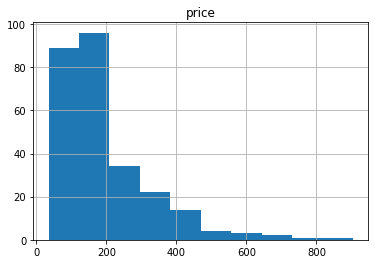

In [67]:
myHood.hist(column='price')

### Price by Type of property

In [68]:
property_type_price_means = Has_review.groupby('property_type')['price'].mean()
property_type_price_means.sort_values()

property_type
Shared room in villa                     27.750000
Shared room in residential home          35.117647
Shared room in boutique hotel            36.666667
Shared room in bed and breakfast         40.714286
Private room in bungalow                 50.500000
Private room in villa                    67.000000
Shared room in hostel                    73.085106
Shared room in loft                      75.000000
Private room in cottage                  86.500000
Private room in loft                     96.333333
Private room in residential home         98.393568
Private room in serviced apartment      102.333333
Private room in rental unit             105.300860
Room in serviced apartment              113.333333
Private room in townhouse               114.322581
Barn                                    117.000000
Private room in bed and breakfast       121.850000
Cycladic house                          124.000000
Private room in guest suite             127.354167
Private room     

In [69]:
myHood.property_type.value_counts()

Entire residential home                80
Entire rental unit                     62
Private room in residential home       44
Entire guest suite                     41
Private room in rental unit             9
Entire condominium (condo)              7
Private room in guest suite             5
Private room in condominium (condo)     5
Room in boutique hotel                  3
Entire guesthouse                       3
Entire townhouse                        2
Private room in townhouse               2
Shared room in rental unit              1
Private room in cottage                 1
Entire cabin                            1
Name: property_type, dtype: int64

In [70]:
property_type_price_means_MH = myHood.groupby('property_type')['price'].mean()
property_type_price_means_MH.sort_values()

property_type
Room in boutique hotel                  37.666667
Private room in rental unit             66.888889
Shared room in rental unit              69.000000
Private room in townhouse               78.000000
Private room in condominium (condo)     90.400000
Entire cabin                           126.000000
Private room in residential home       126.068182
Private room in guest suite            133.200000
Private room in cottage                150.000000
Entire guest suite                     157.707317
Entire rental unit                     165.435484
Entire guesthouse                      208.666667
Entire condominium (condo)             216.571429
Entire residential home                300.425000
Entire townhouse                       301.500000
Name: price, dtype: float64

### Unique property types - looking for oddities
Is there anything that does not fit in the simplified types?

In [71]:
Has_review['property_type'].value_counts().head(60)

Entire rental unit                     1339
Private room in residential home        653
Entire residential home                 633
Entire condominium (condo)              477
Entire guest suite                      415
Private room in rental unit             349
Room in boutique hotel                  287
Room in hotel                           158
Private room in condominium (condo)     127
Entire serviced apartment               113
Private room in guest suite              48
Shared room in hostel                    47
Room in aparthotel                       45
Entire loft                              42
Entire guesthouse                        42
Entire townhouse                         41
Private room in townhouse                31
Private room in hostel                   27
Shared room in rental unit               21
Private room in bed and breakfast        20
Shared room in residential home          17
Shared room in bed and breakfast         14
Entire cottage                  

### Price by simplified type of property

In [72]:
room_type_price_means = Has_review.groupby('room_type')['price'].mean()
room_type_price_means.sort_values()
#room_type_price_means/listings_data.bedrooms


room_type
Shared room        146.009346
Private room       151.101846
Entire home/apt    248.117554
Hotel room         262.632911
Name: price, dtype: float64

In [73]:
room_type_price_means_MH = myHood.groupby('room_type')['price'].mean()
room_type_price_means_MH.sort_values()


room_type
Shared room         69.000000
Private room       111.391304
Entire home/apt    222.591837
Name: price, dtype: float64

### Price if superhost 
Superhost requirements

    Completed at least 10 trips OR completed 3 reservations that total at least 100 nights
    Maintained a 90% response rate or higher
    Maintained a 1% cancellation rate (1 cancellation per 100 reservations) or lower, with exceptions made for those that fall under our Extenuating Circumstances policy
    Maintained a 4.8 overall rating (this rating looks at the past 365 days of reviews, based on the date the guest left a review, not the date the guest checked out)


In [74]:
room_type_price_means_MH = myHood.groupby('host_is_superhost')['price'].mean()
room_type_price_means_MH.sort_values()

host_is_superhost
False    192.700935
True     193.484277
Name: price, dtype: float64

In [84]:
#fig, ax = plt.subplots()
#superhost = Has_review[Has_review["host_is_superhost"]== True]
#notSuper = Has_review[Has_review["host_is_superhost"]== False]
# Add a boxplot for the "Height" column in the DataFrames
#ax.boxplot(superhost,notSuper)

# Add x-axis tick labels:
#ax.set_xticklabels(["Superhost", "Not Superhost"])

# Add a y-axis label
#ax.set_ylabel("price")
#room_type Private room
#Has_review.drop(Has_review[Has_review['Price']>850] and Has_review[Has_review['room_type']=='Private room')
Has_review = Has_review[(Has_review['Price'] >= 850) & (Has_review['room_type'] =='Private room')].index
# Specify the category ordering
#supornot = [True, False]

# Create a box plot and set the order of the categories
#sns.catplot(x='host_is_superhost',y='price', data= Has_review, kind='box', order=supornot)

# Show plot
#plt.show()

KeyError: 'Price'

In [ ]:
# box plot this ^

# Histograms

In [ ]:
colList = list(Has_review.columns)
#print(colList)

In [ ]:
numCols = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'price_per_bedroom', 'price_per_person']

In [ ]:
colList = list(Has_review.columns)
NumericDF = Has_review[numCols]

NumericDF.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

### Bernal Heights Histograms

In [ ]:
colListMH = list(myHood.columns)
NumericDFMH = myHood[numCols]

NumericDFMH.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

In [ ]:
NumericDF['price'].value_counts()

In [ ]:
NumericDF.hist(column='price', bins = 60)

### Bernal Price

In [ ]:
NumericDFMH.hist(column='price', bins = 60)

### SF Price has some wierd values at the high end. 
I checked them out, they are bogus.  
I'll drop the ones over 6,500 per night. Below that the numbers seem mostly real.

In [ ]:
NoCrazyRoomPrices = NumericDF[NumericDF['price']<900]
NoCrazyRoomPrices.hist(column='price', bins=50)
print('The average without the clearly bad ones:', NoCrazyRoomPrices.price.mean())

## Average by place type odd prices fixed:

### no fix

In [ ]:
room_type_price_means = Has_review.groupby('room_type')['price'].mean()
room_type_price_means.sort_values()

##### Bernal

In [ ]:
room_type_price_means_MH = myHood.groupby('room_type')['price'].mean()
room_type_price_means_MH.sort_values()

### fixed

In [ ]:
# drop the room if it is Private room or Shared room and over 980
Has_reviewNC =Has_review[Has_review['price'] < 300] 
room_type_price_meansNC = Has_reviewNC.groupby('room_type')['price'].mean()
room_type_price_meansNC.sort_values()

In [ ]:
colList = list(Has_reviewNC.columns)
#colList

In [ ]:
numCols = ['host_response_time', 
           'host_response_rate', 
           'host_acceptance_rate', 
           'host_listings_count', 
           'host_total_listings_count', 
           'accommodates', 
           'bedrooms', 
           'beds', 
           'price', 
           'minimum_nights', 
           'maximum_nights', 
           'number_of_reviews', 
           'review_scores_rating', 
           'review_scores_accuracy', 
           'review_scores_cleanliness', 
           'review_scores_checkin', 
           'review_scores_communication', 
           'review_scores_location', 
           'review_scores_value', 
           'reviews_per_month', 
           'price_per_bedroom', 
           'price_per_person']

In [ ]:
colList = list(Has_reviewNC.columns)
NumericDFNC = Has_reviewNC[numCols]

NumericDFNC.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

##### Bernal

In [ ]:
colList = list(myHood.columns)
NumericDFMH = myHood[numCols]

NumericDFMH.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

In [ ]:
NumericDFNC.corr()

##### Bernal

In [ ]:
NumericDFMH.corr()

In [ ]:
numCols1 = ['host_listings_count', 
           'host_total_listings_count', 
           'minimum_nights', 
           'maximum_nights',
           'host_response_time', 
           'host_response_rate', 
           'host_acceptance_rate', 
           'price']
numCols2 = ['number_of_reviews', 
           'review_scores_rating', 
           'review_scores_accuracy', 
           'review_scores_cleanliness', 
           'review_scores_checkin', 
           'review_scores_communication', 
           'review_scores_location', 
           'review_scores_value', 
           'reviews_per_month', 
           'accommodates', 
           'bedrooms', 
           'beds', 
           'price']

In [ ]:
NumericDFNC1 = Has_reviewNC[numCols1]

NumericDFNC1.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

In [ ]:
NumericDFNC2 = Has_reviewNC[numCols2]

NumericDFNC2.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

##### Bernal

In [ ]:
NumericDFMH1 = Has_reviewNC[numCols1]

NumericDFMH1.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

In [ ]:
NumericDFMH2 = Has_reviewNC[numCols2]

NumericDFMH2.hist(figsize=(20, 15))
plt.subplots_adjust(hspace=0.5);

# Pair Plots

In [ ]:
sns.pairplot(NumericDFNC1)

In [ ]:
sns.pairplot(NumericDFNC2)

##### Bernal

In [ ]:
sns.pairplot(NumericDFMH1)

In [ ]:
sns.pairplot(NumericDFMH2)

# Heat Map Best fullest data so far with a bit too much averaging

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(NumericDFNC1.corr(), annot=True, annot_kws={"fontsize":9})

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(NumericDFNC2.corr(), annot=True, annot_kws={"fontsize":9})

##### Bernal

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(NumericDFMH1.corr(), annot=True, annot_kws={"fontsize":9})

In [ ]:
plt.figure(figsize=(15,11))
sns.heatmap(NumericDFMH2.corr(), annot=True, annot_kws={"fontsize":9})

## Saving Data

In [ ]:
Has_reviewNC.shape

In [ ]:
# save the data to a new csv file
#datapath = '../data'

Has_reviewNC.to_csv('AirBnB_listings_Has_review_NC.csv')

#save_file(filled_avg, 'AirBnB_listings_averaged_cleaned.csv', datapath)

##### Bernal save

In [ ]:
myHood.shape

In [ ]:
# save the data to a new csv file
#datapath = '../data'

myHood.to_csv('AirBnB_listings_Has_review_Bernal.csv')

#save_file(filled_avg, 'AirBnB_listings_averaged_cleaned.csv', datapath)